# Atmospheric Concentration of Carbon Dioxide (CO2) 
 
```{glue:figure} trend_fig
:scale: 50%
:align: right
```

Highlights 

Over the last {glue:text}`n_years:.0f` years, the concentration of carbon dioxide (CO2) in the atmosphere measured at NOAA’s Mauna Loa Observatory has increased by more than {glue:text}`change:.0f` parts per million (ppm), to an annual average value over {glue:text}`co2_2024:.0f` ppm in 2024. 

The annual average rate of increase in CO2 since {glue:text}`start_year:.0f` at Mauna Loa is more than {glue:text}`trend:.2f` ppm per year.

In [1]:
import os

import os.path as op

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

from myst_nb import glue 
from IPython.display import HTML

import sys
sys.path.append("../../../functions")
from data_downloaders import download_HOT_CO2_data, download_MLO_CO2_data

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting import plot_timeseries
from ind_setup.plotting_int import plot_timeseries_interactive, fig_int_to_glue
from ind_setup.tables import plot_df_table

## Observations from NOAA

Databases used:
- Atmospheric C02 from the Muana Loa Observatory ([ESRL at NOAA](https://www.esrl.noaa.gov/))

In [2]:
update_data = True
path_data = "../../../data"

In [3]:
url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt'

if update_data:
    MLO_data = download_MLO_CO2_data(url)
    MLO_data.to_pickle(op.join(path_data, 'MLO_co2.pkl'))
else:
    MLO_data = pd.read_pickle(op.join(path_data, 'MLO_co2.pkl'))    

## Plotting

Muana Loa Observatory

In [4]:
dict_plot = [{'data' : MLO_data, 'var' : 'CO2', 'ax' : 1, 'label' : 'MLO: CO2'},]

In [5]:
MLO_data['CO2_deseasoned'] = MLO_data['CO2'].rolling(window=12, center=True).mean()
glue("n_years", len(np.unique(MLO_data.index.year)), display=False)
glue("co2_2024", int(MLO_data.loc['2024'].CO2.mean()), display=False)
glue("start_year", MLO_data.dropna().index[0].year, display=False)

In [6]:
dict_plot = [{'data' : MLO_data, 'var' : 'CO2', 'ax' : 1, 'trendline' : True, 'label' : 'MLO: CO2'},
             {'data' : MLO_data, 'var' : 'CO2_deseasoned', 'ax' : 1, 'trendline' : False, 'label' : 'MLO: CO2 (Deseasoned)'}]

In [7]:
fig, trend = plot_timeseries_interactive(dict_plot, trendline=True, figsize=(20, 10), return_trend=True);
fig.write_html(op.join(path_data, 'figures', 'F1_CO2_trend.html'), include_plotlyjs="cdn")


glue("trend", float(trend[0]), display=False)
glue("change", float(trend[0]*len(np.unique(MLO_data.index.year))), display=False)
glue("trend_fig", fig_int_to_glue(fig), display=False)

**Fig.** Monthly Mean Concentration of Atmospheric CO2 at Mauna Loa since {glue:text}`start_year`. The blue line represents the monthly mean values, centered on the middle of each month. The red line represents the same, after correction for the average seasonal cycle.  The solid black line represents the trend, which is  statistically significant (p < 0.05).  The annual oscillations at Mauna Loa are due to the seasonal imbalance between the photosynthesis and respiration of plants on land. From NOAA ESRL Global Monitoring Division. https://www.esrl.noaa.gov/gmd/ccgg/trends/ 


In [8]:
from scipy.stats import linregress
MLOy = MLO_data[['CO2']].groupby(MLO_data.index.year).mean()
MLOy.index = pd.to_datetime(MLOy.index, format = '%Y')

Annual Stats

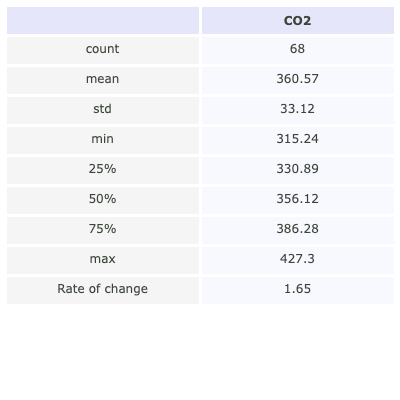

In [9]:
d = MLOy.describe()
d.loc['Rate of change'] = trend
fig = plot_df_table(np.round(d, 2), figsize = (400, 400))
